In [64]:
import numpy as np
import matplotlib.pyplot as plt
import random
import itertools
import numpy as np
from google.colab import drive

Three memory patterns

In [2]:
def energy(patterns, weights,):
    E = 0
    for i in range(len(patterns)):
        for j in range(len(patterns)):
            E -= weights[i, j] * patterns[i] * patterns[j]
    return E

In [61]:
def flip(v, n):
    vec = np.copy(v)
    chosen = random.sample(range(len(vec)), n)
    for a in chosen:
        vec[a] *= -1
    return vec

In [58]:
def update(weights, pattern):
    new = np.matmul(weights, pattern)
    return ((np.vectorize(sign))(new))

In [59]:
def converge(weights, train, max):
    input = update(weights, train)
    maxTrials = max
    tried = 0
    while not(tried > maxTrials):
        inputNew = update(weights, input)
        input = inputNew
        tried += 1
    return np.asarray(inputNew)

In [3]:
x1=np.array([-1,-1,1,-1,1,-1,-1,1],dtype=float)
x2=np.array([-1,-1,-1,-1,-1,1,-1,-1],dtype=float)
x3=np.array([-1,1,1,-1,-1,1,-1,1],dtype=float)

In [4]:
patterns=np.array([x1,x2,x3])

In [5]:
#Creation of the weight matrix

def weight_matrix(patterns,scaling):
  n=len(patterns[0])
  P=len(patterns)
  W=np.zeros((n,n))
  for i in range (n):
    for j in range(n):
     #if j==i:
        #W[i,j]=0
        #continue
      somme=0
      for mu in range(P):
        x_mu=patterns[mu]
        somme = somme + x_mu[i]*x_mu[j]
      W[i,j]=somme
      if scaling==True:
        W[i,j]=W[i,j]/n # if scale is True, we scale with the number of units
  return W

In [6]:
W1=weight_matrix(patterns,scaling=True)
W2=weight_matrix(patterns,scaling=False)

Update rule

In [7]:
def sign(x):
  if x>=0:
    return 1
  else:
    return -1

In [8]:
#this function updates just a single vector one time in batch mode - Use this function Hopfield Little Model
def one_update_rule_batch1(x,W):
  new = np.dot(W,x)
  new[new>=0]=1
  new[new<0]=-1
  return new

In [9]:
#this function updates just a single vector one time in batch mode - Use this function Hopfield Little Model
def one_update_rule_batch(x,W):
  new = np.dot(W,x)
  for i in range(len(new)):
    new[i]=sign(new[i])
  return new

In [10]:
#this function sequentially updates just a single vector one time

def one_update_rule_sequential(x,W):
        dimension = x.shape[0]
        new = np.copy(x)
        for i in range(dimension):
            sum_ = 0
            for j in range(dimension):
                sum_ += np.multiply(W[i][j], new[j])
            if sum_ < 0:
                new[i] = -1
            else:
                new[i] = 1
        return new

In [11]:
def one_update_rule_random(x,W):
  N=len(x)
  new_x=np.copy(x)
  for count in range(N):
    i = np.random.randint(0,N)
    quantity = W[i,:].dot(x)
    new_x[i]=sign(quantity)
  return new_x

In [12]:
#this function updates just a single vector until convergence and returns the new vector as well as the number of iterations before convergence

def update_rule(x,W,update,display=False, max_iter=50):
  list_x=[]
  energy_list=[]
  iterations=0
  condition=True
  x_before=np.copy(x)
  while(condition):
    if iterations%10==0 and iterations!=0:
      print("Iteration: ",iterations)
    if iterations == max_iter:
      break
    #print(np.count_nonzero(np.array(x_before)-np.array(x_after)))
    if update=="batch":
      x_after=one_update_rule_batch(x_before,W)
    elif update=="sequential":
      x_after=one_update_rule_sequential(x_before,W)
    elif update=="random":
      x_after=one_update_rule_random(x_before,W)
      if display==True:
        display_pattern(x_after)
    if x_after.tolist() in list_x and not np.all(x_after==x_before):
      print("oscillations")
    list_x.append(x_after.tolist())
    iterations+=1
    energy_list.append(energy(x_after,W))
    condition=not np.all(x_after==x_before)
    x_before=np.copy(x_after)
    #print(energy(x_after,W))
  return x_after,iterations,energy_list,list_x

In [13]:
for x in patterns:
  print("Old pattern was ",x," updated pattern is ",update_rule(x,W2,"batch")[0])
  if (np.array_equal(x,update_rule(x,W2,"batch")[0])):
    print("They're the same")

Old pattern was  [-1. -1.  1. -1.  1. -1. -1.  1.]  updated pattern is  [-1. -1.  1. -1.  1. -1. -1.  1.]
They're the same
Old pattern was  [-1. -1. -1. -1. -1.  1. -1. -1.]  updated pattern is  [-1. -1. -1. -1. -1.  1. -1. -1.]
They're the same
Old pattern was  [-1.  1.  1. -1. -1.  1. -1.  1.]  updated pattern is  [-1.  1.  1. -1. -1.  1. -1.  1.]
They're the same


The network is able to store all three patterns

# 3 Tasks and questions 

## 3.1 Convergence and attractors

### Update rule on three distorded input patterns

In [14]:
x1d=np.array([1,-1,1,-1,1,-1,-1,1])
x2d=np.array([1,1,-1,-1,-1,1,-1,-1])
x3d=np.array([1,1,1,-1,1,1,-1,1])

In [15]:
patterns_distorded=np.array([x1d,x2d,x3d])

In [16]:
#this function updates each pattern of a set of patterns and returns the array of updated patterns as well as the number of iterations before convergence for each pattern

def update_patterns(patterns,W,update):
  list_iterations=[]
  new_patterns=[]
  for mu in range(len(patterns)):
    pattern=patterns[mu]
    new_pattern,iteration,energy_list,list_x=update_rule(pattern,W,update)
    new_patterns.append(new_pattern)
    list_iterations.append(iteration)
  return np.array(new_patterns),list_iterations

In [17]:
new_patterns,list_iterations=update_patterns(patterns_distorded,W2,"batch")

In [18]:
for i in range(len(new_patterns)):
  x=new_patterns[i]
  print("The new patterns is ",x," and the correct pattern was ",patterns[i]," The convergence takes ",list_iterations[i]," iterations")
  if (np.array_equal(x,patterns[i])):
    print("They're the same")

The new patterns is  [-1. -1.  1. -1.  1. -1. -1.  1.]  and the correct pattern was  [-1. -1.  1. -1.  1. -1. -1.  1.]  The convergence takes  2  iterations
They're the same
The new patterns is  [-1.  1. -1. -1. -1.  1. -1. -1.]  and the correct pattern was  [-1. -1. -1. -1. -1.  1. -1. -1.]  The convergence takes  2  iterations
The new patterns is  [-1.  1.  1. -1. -1.  1. -1.  1.]  and the correct pattern was  [-1.  1.  1. -1. -1.  1. -1.  1.]  The convergence takes  3  iterations
They're the same


x1d and x3d converge towards stored patterns.
After 3 iterations, x2d does not converge toward x2

### How many attractors are there in the network ?

In [19]:
# Creation of the set of all combinations of patterns

all_patterns = [list(i) for i in itertools.product([-1, 1], repeat=8)]

In [20]:
# For each combination, find the fixed point
fixed_points,list_iterations=update_patterns(all_patterns,W2,"sequential")

In [21]:
# Return the list of uniques fixed points, hence the number of attractors
attractors= np.unique(fixed_points, axis=0)
occurences=np.zeros(len(attractors))
index=0
for attractor in attractors:
  for i in range(len(fixed_points)):
    if np.array_equal(attractor,fixed_points[i]):
      occurences[index]+=1
  index+=1
print("The number of attractors in this network is ",len(attractors))

The number of attractors in this network is  14


In [22]:
attractors

array([[-1, -1, -1, -1, -1,  1, -1, -1],
       [-1, -1, -1, -1,  1, -1, -1, -1],
       [-1, -1,  1, -1, -1,  1, -1,  1],
       [-1, -1,  1, -1,  1, -1, -1,  1],
       [-1, -1,  1, -1,  1,  1, -1,  1],
       [-1,  1, -1, -1, -1,  1, -1, -1],
       [-1,  1,  1, -1, -1,  1, -1,  1],
       [-1,  1,  1, -1,  1, -1, -1,  1],
       [ 1, -1, -1,  1,  1, -1,  1, -1],
       [ 1,  1, -1,  1, -1,  1,  1, -1],
       [ 1,  1, -1,  1,  1, -1,  1, -1],
       [ 1,  1, -1,  1,  1,  1,  1, -1],
       [ 1,  1,  1,  1, -1,  1,  1,  1],
       [ 1,  1,  1,  1,  1, -1,  1,  1]])

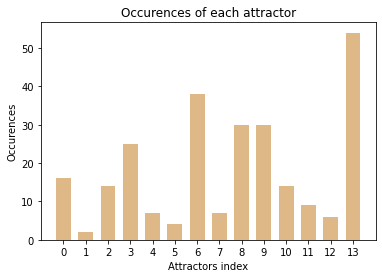

In [23]:
plt.xticks(np.arange(len(attractors)))
width = 1/1.5
plt.bar(range(len(attractors)), occurences, width, color="burlywood")
plt.xlabel("Attractors index")
plt.ylabel("Occurences")
plt.title("Occurences of each attractor")
plt.show()

### Behavior for more dissimilar starting patterns

In [24]:
# These three input patterns have 5 bit errors, compared with x1,x2 and x3

x1_very_dissimilar=np.array([1,1,-1,1,-1,-1,-1,1])
x2_very_dissimilar=np.array([1,1,1,1,1,1,-1,-1])
x3_very_dissimilar=np.array([1,-1,-1,1,1,1,-1,1])

In [25]:
patterns_very_dissimilar=np.array([x1_very_dissimilar,x2_very_dissimilar,x3_very_dissimilar])

In [26]:
new_patterns,list_iterations=update_patterns(patterns_very_dissimilar,W2,"batch")

In [27]:
for i in range(len(new_patterns)):
  x=new_patterns[i]
  print("The new patterns is ",x," and the correct pattern was ",patterns[i]," The convergence takes ",list_iterations[i]," iterations")
  if (np.array_equal(x,patterns[i])):
    print("They're the same")
  else:
    print("They are different")

The new patterns is  [ 1.  1.  1.  1.  1. -1.  1.  1.]  and the correct pattern was  [-1. -1.  1. -1.  1. -1. -1.  1.]  The convergence takes  3  iterations
They are different
The new patterns is  [ 1.  1.  1.  1.  1. -1.  1.  1.]  and the correct pattern was  [-1. -1. -1. -1. -1.  1. -1. -1.]  The convergence takes  3  iterations
They are different
The new patterns is  [ 1. -1. -1.  1.  1. -1.  1. -1.]  and the correct pattern was  [-1.  1.  1. -1. -1.  1. -1.  1.]  The convergence takes  2  iterations
They are different


It seems that if the input patterns are very dissimilar, the memory cannot recall the stored patterns

## 3.2 Sequential Update

In [28]:
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
pict=np.genfromtxt("/content/drive/My Drive/KTH/NeuralNetwork/Lab3/pict.dat", dtype = None, delimiter = ',',encoding=None)

In [30]:
# this function separate all the data in 11 patterns of size 1024

def separation(data):
  patterns=[]
  L=[]
  for i in range(len(data)):
    if i%1024==0 and i!=0:
      patterns.append(np.array(L))
      L=[]
    L.append(data[i])
  patterns.append(np.array(L))
  return patterns

In [31]:
patterns=separation(pict)

In [32]:
p1=patterns[0]
p2=patterns[1]
p3=patterns[2]
p4=patterns[3]
p5=patterns[4]
p6=patterns[5]
p7=patterns[6]
p8=patterns[7]
p9=patterns[8]
p10=patterns[9]
p11=patterns[10]

In [33]:
# this function displays each pattern as a 32x32 image

def display_pattern(pattern):
  pattern=pattern.reshape(32,32)
  plt.imshow(pattern, interpolation='nearest')
  if np.array_equal(pattern,p10.reshape(32,32)) or np.array_equal(pattern,p11.reshape(32,32)):
    plt.title("Degraded pattern")
  else:
    plt.title("Pattern")
  plt.show()

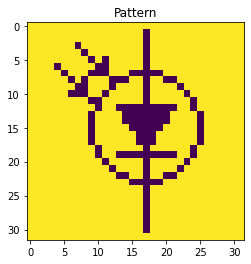

In [34]:
display_pattern(p3)

#### Learning of the first three patterns

In [35]:
training_patterns=np.array([p1,p2,p3])

In [36]:
W=weight_matrix(training_patterns,scaling=True)

### Check that the three patterns are stable

In [37]:
for x in training_patterns:
  print("Old pattern was ",x," updated pattern is ",update_rule(x,W,"batch")[0]," and the convergence takes ",update_rule(x,W,"batch")[1]," iterations")
  if (np.array_equal(x,update_rule(x,W,"batch")[0])):
    print("They're the same")

Old pattern was  [-1 -1 -1 ... -1 -1 -1]  updated pattern is  [-1. -1. -1. ... -1. -1. -1.]  and the convergence takes  1  iterations
They're the same
Old pattern was  [-1 -1 -1 ... -1 -1 -1]  updated pattern is  [-1. -1. -1. ... -1. -1. -1.]  and the convergence takes  1  iterations
They're the same
Old pattern was  [1 1 1 ... 1 1 1]  updated pattern is  [1. 1. 1. ... 1. 1. 1.]  and the convergence takes  1  iterations
They're the same


The three patterns are stable

### Can the network complete a degraded pattern? 

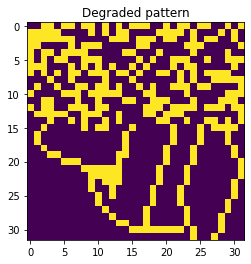

In [38]:
display_pattern(p10)

The convergence takes  2  iterations


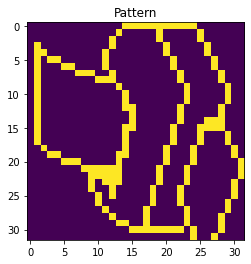

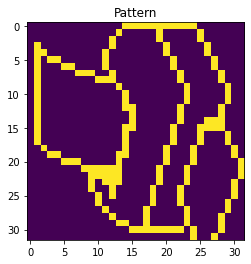

They're the same


In [39]:
new_p10,iterations,energy_list,list_x=update_rule(p10,W,"batch")
print("The convergence takes ",iterations," iterations")
display_pattern(p1)
display_pattern(new_p10)
if (np.array_equal(p1,new_p10)):
    print("They're the same")

The network can complete a degraded pattern

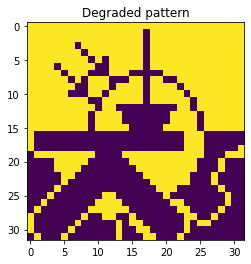

In [40]:
display_pattern(p11)

The convergence takes  3  iterations


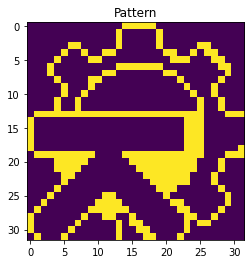

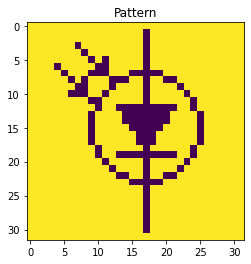

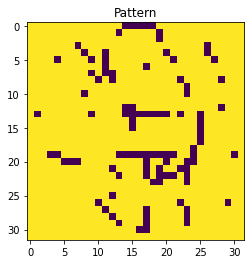

In [41]:
new_p11,iterations,energy_list,list_x=update_rule(p11,W,"batch")
print("The convergence takes ",iterations," iterations")
display_pattern(p2)
display_pattern(p3)
display_pattern(new_p11)

So the network cannot complete a pattern that is a mixture of two learnt patterns in batch mode

### Sequential update with random units

The convergence takes  3  iterations


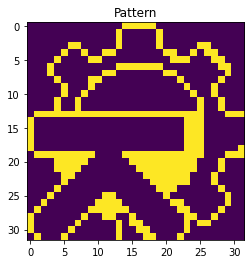

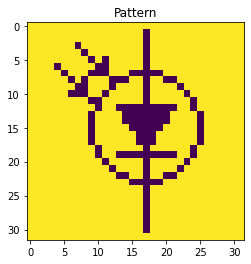

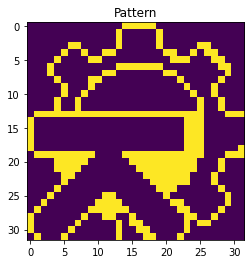

In [42]:
new_p11,iterations,energy_list,list_x=update_rule(p11,W,"sequential")
print("The convergence takes ",iterations," iterations")
display_pattern(p2)
display_pattern(p3)
display_pattern(new_p11)

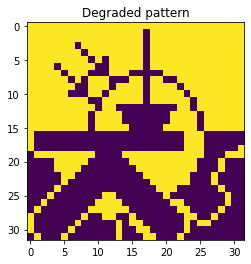

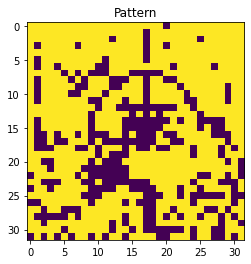

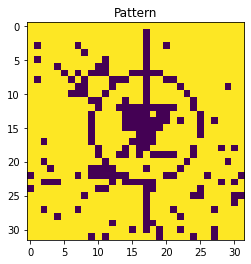

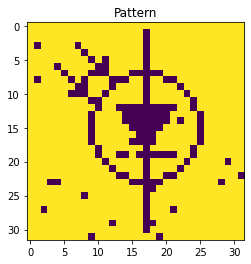

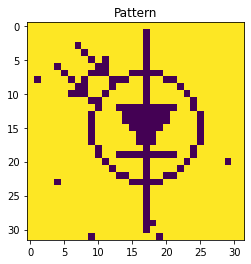

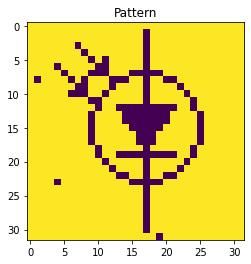

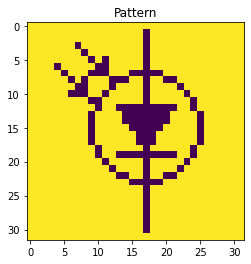

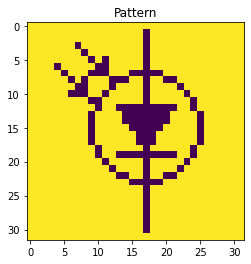

The convergence takes  7  iterations
This is the recalled pattern


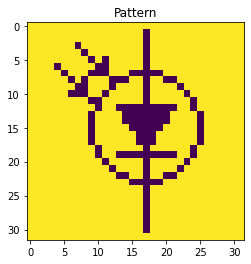

In [43]:
display_pattern(p11)
new_p11,iterations,energy_list,list_x=update_rule(p11,W,"random",display=True)
print("The convergence takes ",iterations," iterations")
print("This is the recalled pattern")
display_pattern(new_p11)

With a sequential update, the pattern converges most of the time to the pattern p3 in a few iterations
The number of iterations needed for convergence is not constant

#3.3 Energy

In [44]:
for i in range(3):
    e = energy(patterns[i], W)
    print("Energy of attractor pattern p", i+1, " : ", e)

Energy of attractor pattern p 1  :  -1439.390625
Energy of attractor pattern p 2  :  -1365.640625
Energy of attractor pattern p 3  :  -1462.25


In [45]:
# energy of distorted patterns
for i in range(9, 11):
    e = energy(patterns[i], W)
    print("Energy of distorted pattern p", i+1, " : ", e)

Energy of distorted pattern p 10  :  -415.98046875
Energy of distorted pattern p 11  :  -173.5


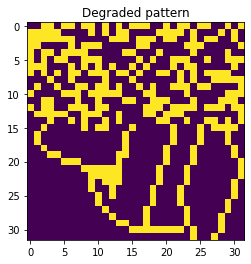

The convergence takes  6  iterations
This is the recalled pattern


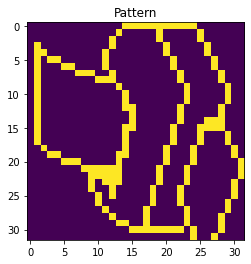

In [46]:
display_pattern(p10)
new_p10,iterations10, p10energy,list_x=update_rule(p10,W,"random",display=False)
print("The convergence takes ",iterations10," iterations")
print("This is the recalled pattern")
display_pattern(new_p10)

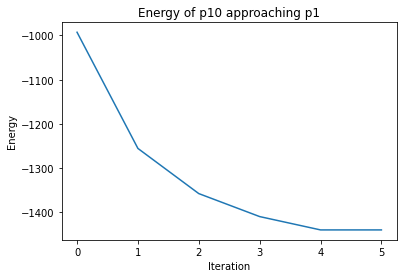

In [47]:
xaxis = np.arange(0, iterations10)
plt.plot(xaxis, p10energy)
plt.title("Energy of p10 approaching p1")
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.show()

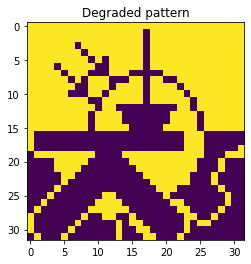

The convergence takes  8  iterations
This is the recalled pattern


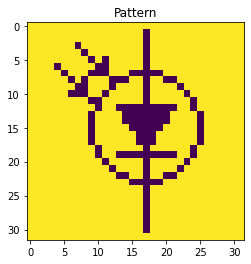

In [48]:
display_pattern(p11)
new_p11,iterations11, p11energy,list_x=update_rule(p11,W,"random",display=False)
print("The convergence takes ",iterations11," iterations")
print("This is the recalled pattern")
display_pattern(new_p11)

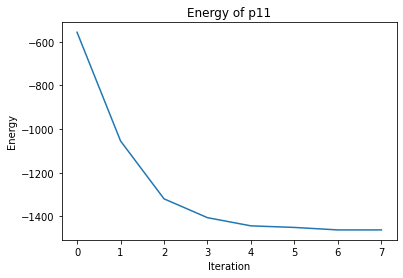

In [49]:
xaxis = np.arange(0, iterations11)
plt.plot(xaxis, p11energy)
plt.title("Energy of p11")
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.show()

When we use sequential update rule, the energy decreases from iteration to iteration.

In [50]:
# Random weights
dim = 1023
randW = np.random.normal(size=(dim+1, dim+1))

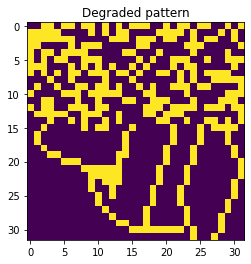

Iteration:  10
Iteration:  20
Iteration:  30
Iteration:  40
Iteration:  50
Iteration:  60
Iteration:  70
Iteration:  80
Iteration:  90
Iteration:  100
The convergence takes  100  iterations
This is the recalled pattern


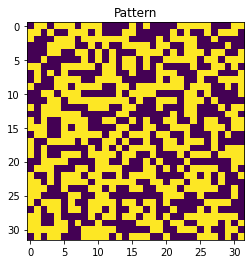

In [51]:
display_pattern(p10)
new_p10,iterations10, p10energy,list_x=update_rule(p10,randW,"random",display=False, max_iter=100)
print("The convergence takes ",iterations10," iterations")
print("This is the recalled pattern")
display_pattern(new_p10)

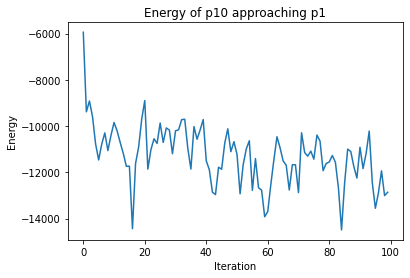

In [52]:
xaxis = np.arange(0, iterations10)
plt.plot(xaxis, p10energy)
plt.title("Energy of p10 approaching p1")
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.show()

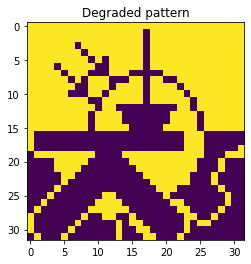

Iteration:  10
Iteration:  20
Iteration:  30
Iteration:  40
Iteration:  50
Iteration:  60
Iteration:  70
Iteration:  80
Iteration:  90
Iteration:  100
The convergence takes  100  iterations
This is the recalled pattern


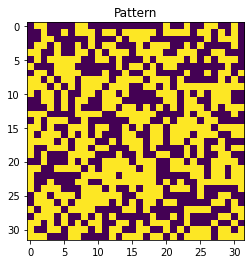

In [53]:
display_pattern(p11)
new_p11,iterations11, p11energy,list_x=update_rule(p11,randW,"random",display=False, max_iter=100)
print("The convergence takes ",iterations11," iterations")
print("This is the recalled pattern")
display_pattern(new_p11)

With a weight matrix by setting the weights to normally distributed random numbers, we observe that the patterns don't converge. There is oscillation in term of energy function.

Iteration:  10
Iteration:  20
Iteration:  30
The convergence takes  34  iterations
This is the recalled pattern


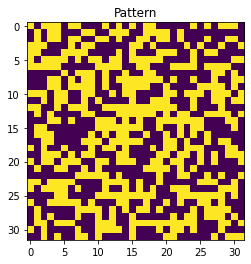

In [54]:
# Symmetric random weight 
randSymW = 0.5 * (randW + randW.T)
new_p10,iterations10, p10energy,list_x=update_rule(p10,randSymW,"random",display=False, max_iter=100)
print("The convergence takes ",iterations10," iterations")
print("This is the recalled pattern")
display_pattern(new_p10)

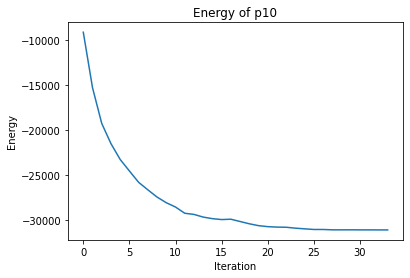

In [55]:
xaxis = np.arange(0, iterations10)
plt.plot(xaxis, p10energy)
plt.title("Energy of p10")
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.show()

Iteration:  10
Iteration:  20
Iteration:  30
Iteration:  40
Iteration:  50
Iteration:  60
Iteration:  70
Iteration:  80
The convergence takes  89  iterations
This is the recalled pattern


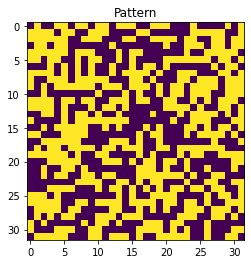

In [56]:
# Symmetric random weight 
new_p11,iterations11, p11energy,list_x=update_rule(p11,randSymW,"random",display=False, max_iter=100)
print("The convergence takes ",iterations11," iterations")
print("This is the recalled pattern")
display_pattern(new_p11)

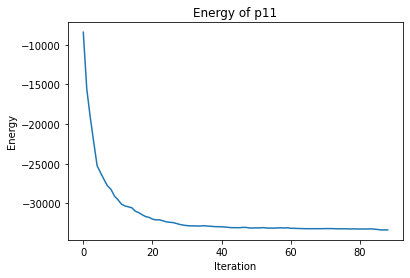

In [57]:
xaxis = np.arange(0, iterations11)
plt.plot(xaxis, p11energy)
plt.title("Energy of p11")
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.show()

When we make the weight matrix symmetric, we observe that the energy decreases and patterns converge, but don't vonverge to the right attractor.

#3.4 Noise removal

In [65]:
# flip N percent of the bits One step
converged = []
convergedi = [[],[],[],[]]
for N in range(101):
    total = 0
    for i in range(3):
        noisy = flip(patterns[i], int(10.24 * N))
        noisyOut = converge(W, noisy, 1)
        succ = np.array_equal(noisyOut, patterns[i])
        convergedi[i].append(1*succ)
        total += succ
    converged.append(total/3.)

Text(0, 0.5, 'Accuracy')

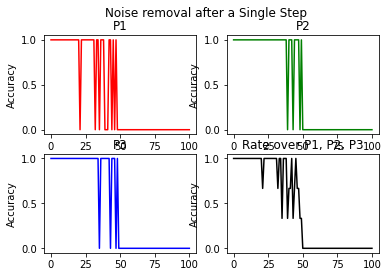

In [67]:
xaxis = np.arange(0, 101)

plt.figure()
plt.suptitle("Noise removal after a Single Step")

plt.subplot(2, 2, 1)
plt.plot(xaxis, convergedi[0], 'r', label='p1')
plt.title('P1')
plt.ylabel("Accuracy")

plt.subplot(2, 2, 2)
plt.plot(xaxis, convergedi[1], 'g', label='p2')
plt.title('P2')
plt.ylabel("Accuracy")

plt.subplot(2, 2, 3)
plt.plot(xaxis, convergedi[2], 'b', label='p3')
plt.title('P3')
plt.ylabel("Accuracy")

plt.subplot(2, 2, 4)
plt.plot(xaxis, converged, 'k', label='p1')
plt.title('Rate over P1, P2, P3')
plt.ylabel("Accuracy")

We observe that we can remove a maximum of 50% noise.

WIth regards to noise tolerance, we observe that the attractor P2 has the smallest error tolerance, its oscillation bearing is the shortest. And the attractor P3 has the biggest error tolerance.


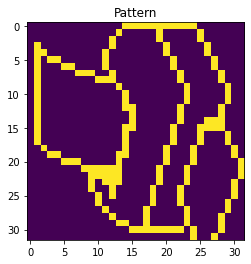

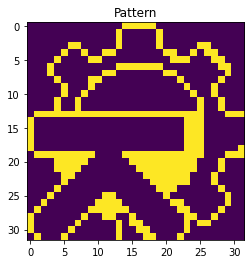

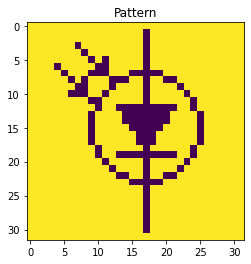

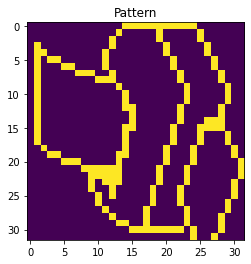

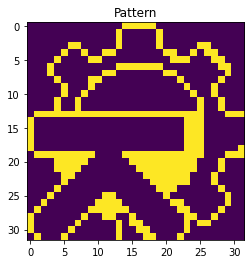

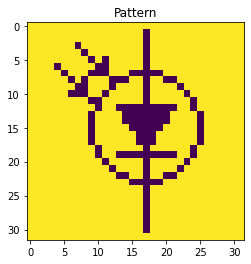

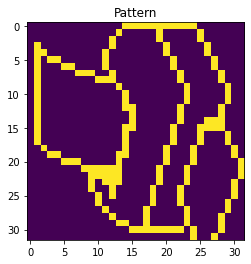

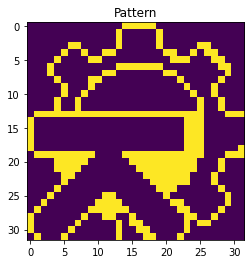

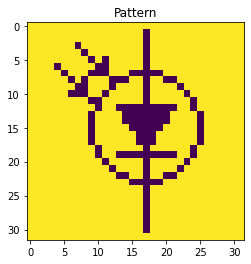

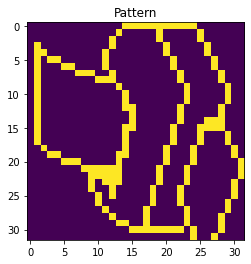

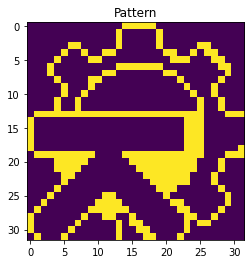

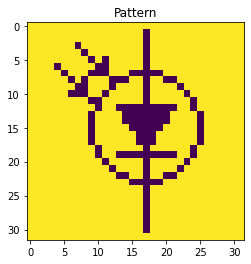

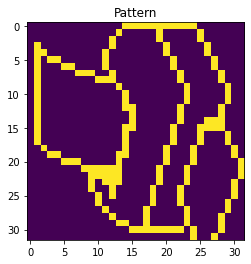

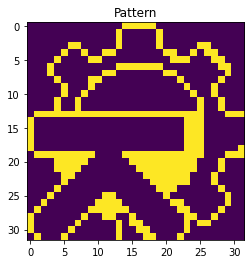

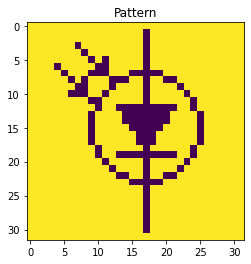

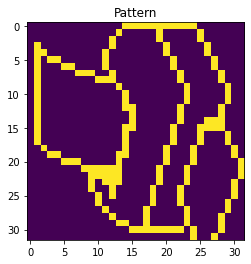

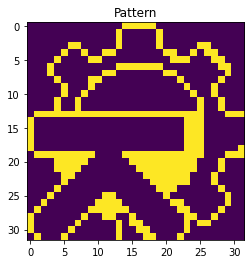

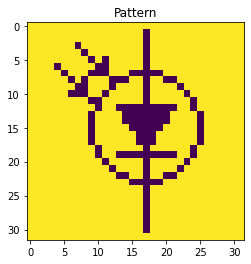

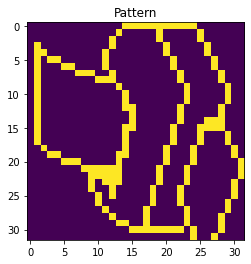

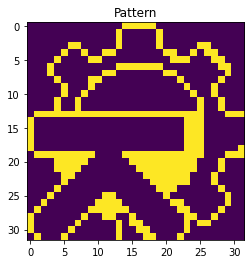

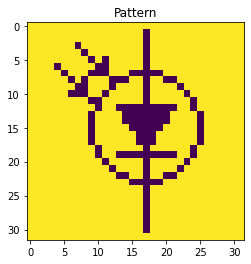

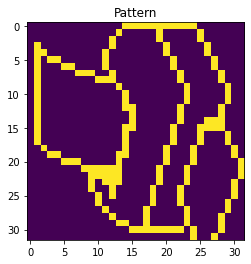

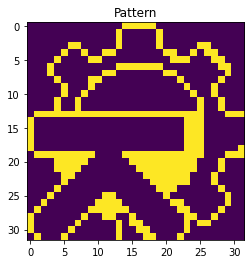

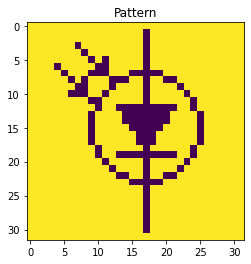

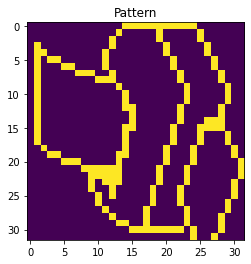

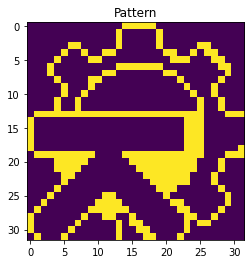

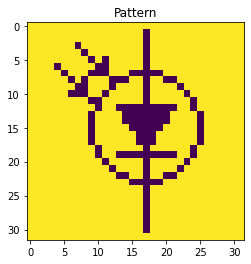

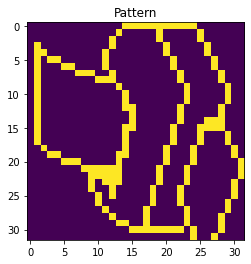

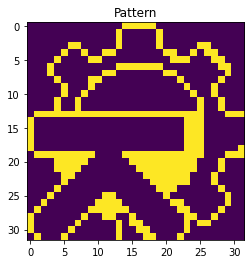

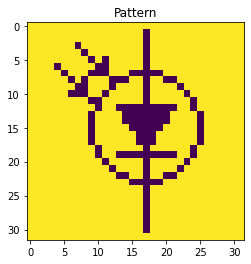

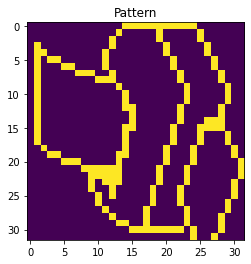

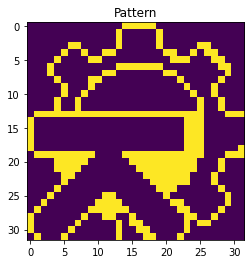

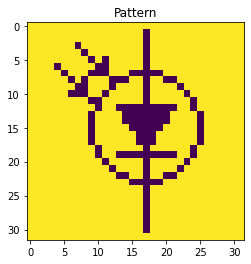

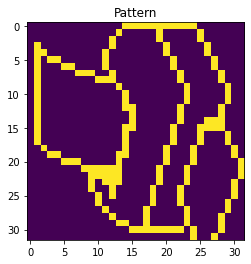

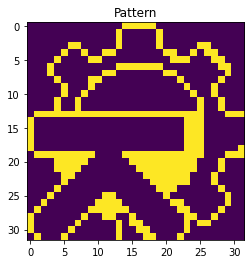

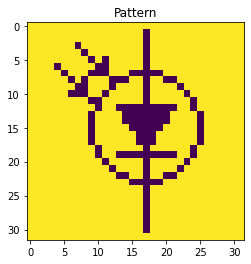

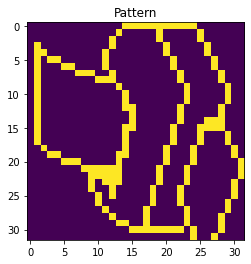

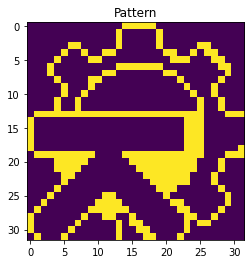

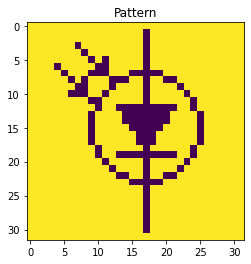

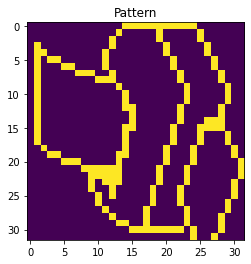

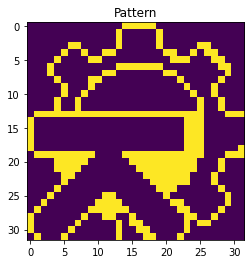

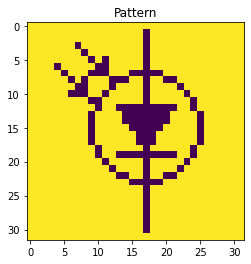

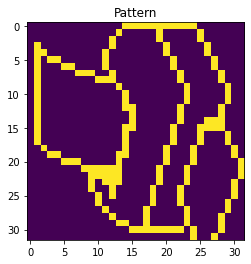

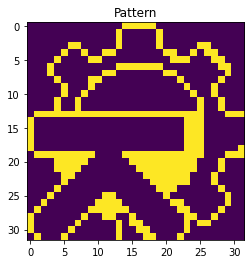

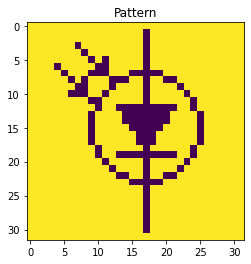

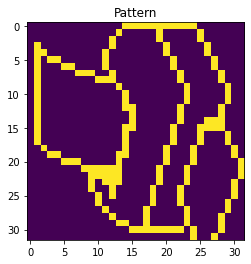

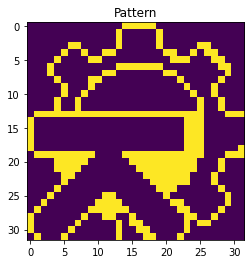

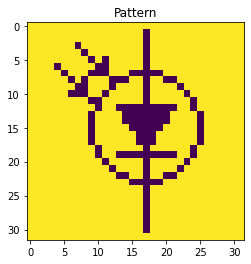

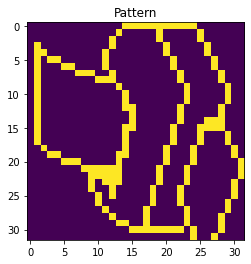

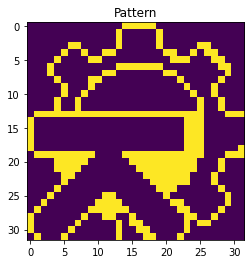

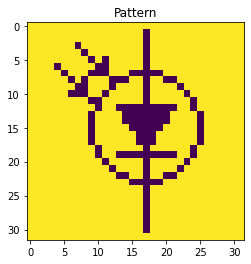

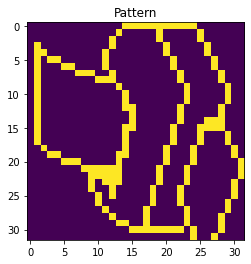

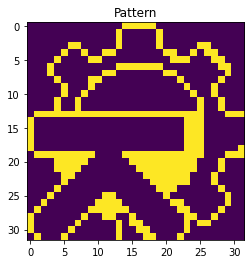

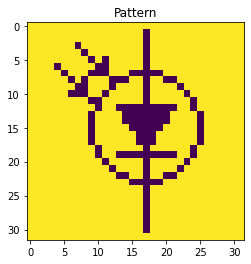

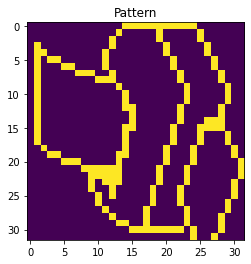

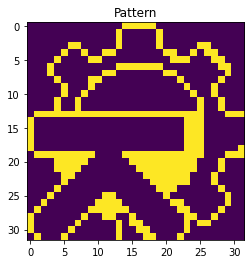

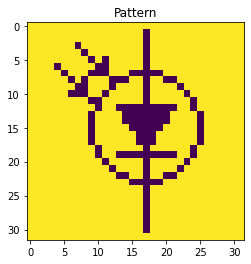

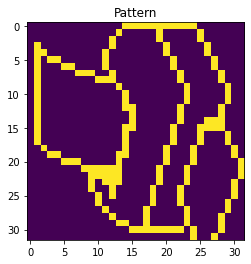

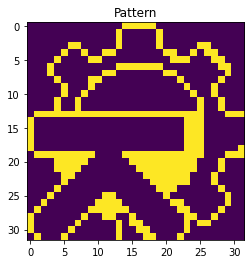

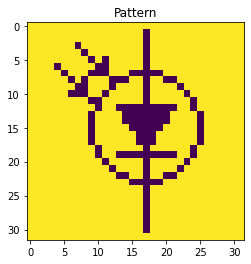

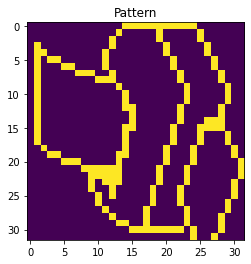

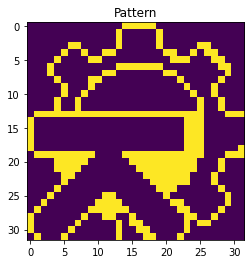

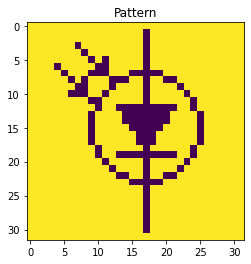

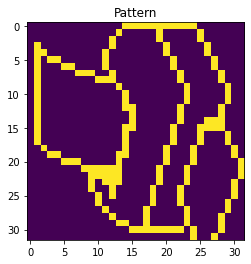

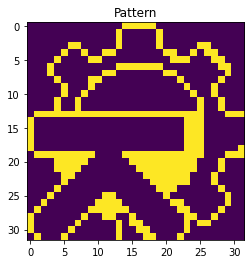

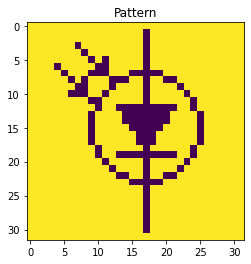

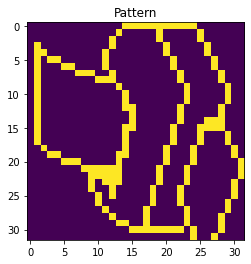

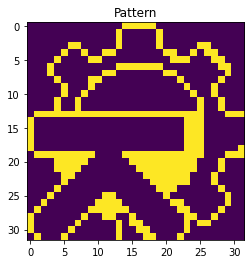

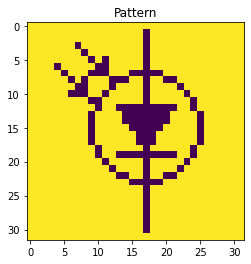

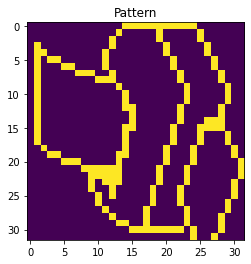

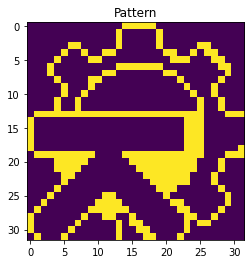

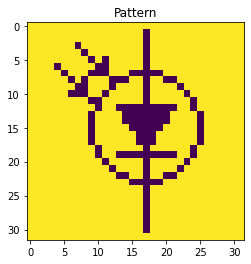

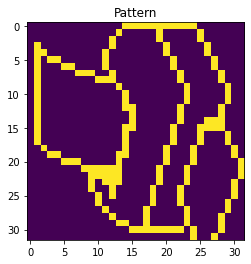

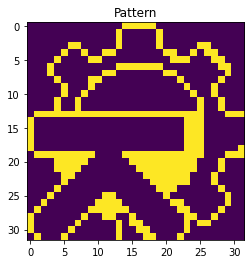

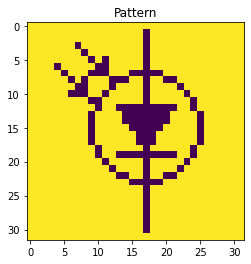

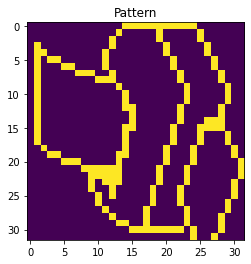

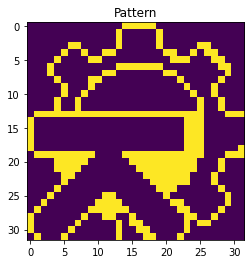

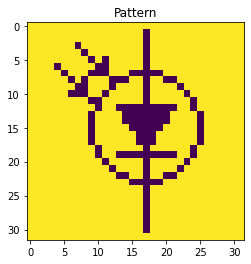

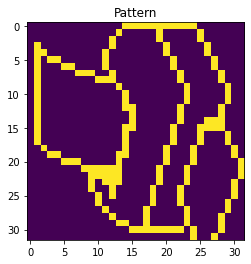

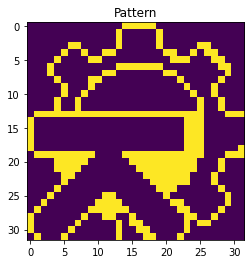

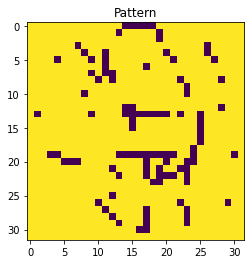

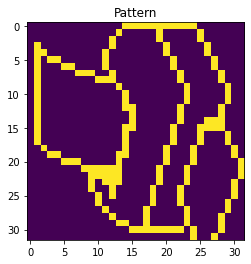

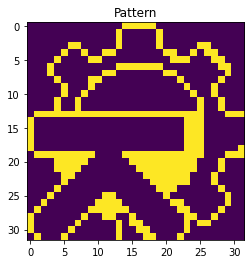

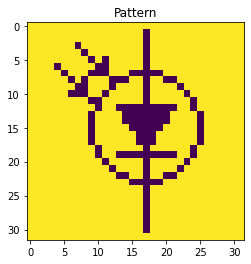

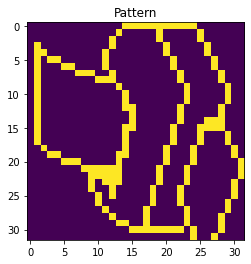

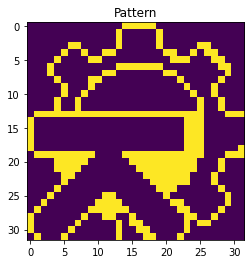

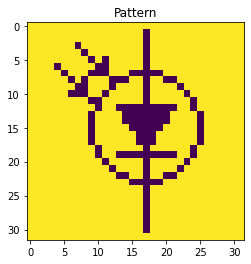

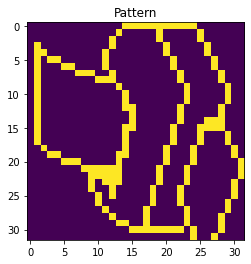

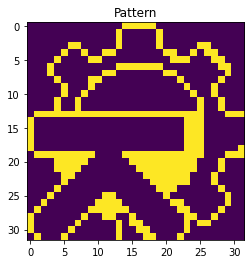

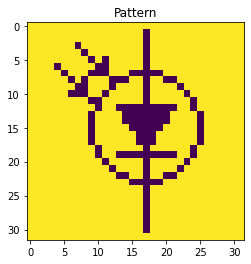

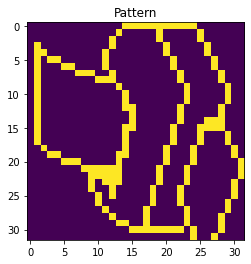

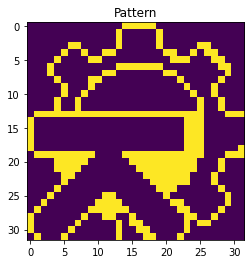

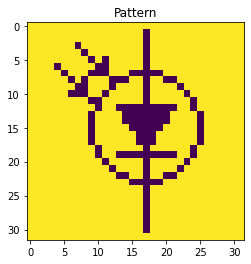

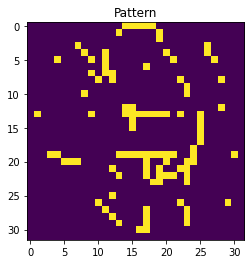

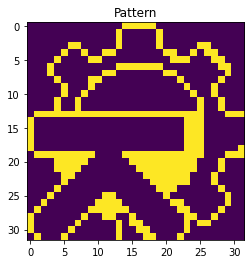

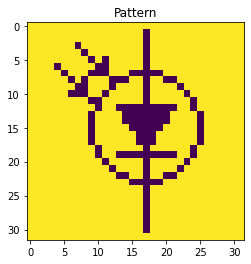

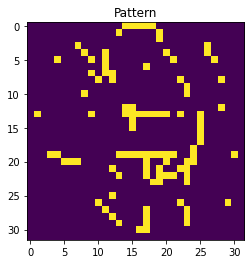

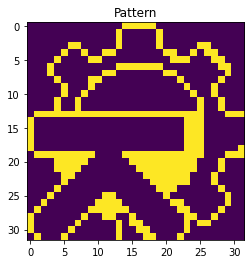

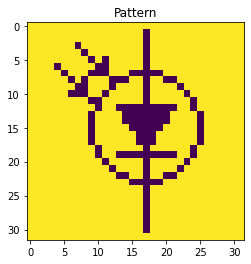

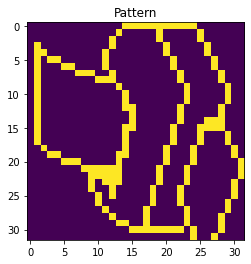

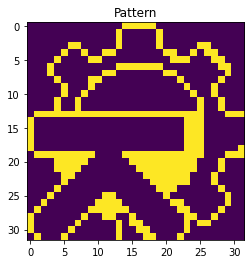

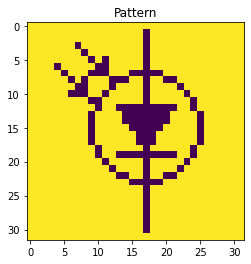

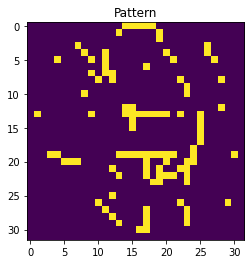

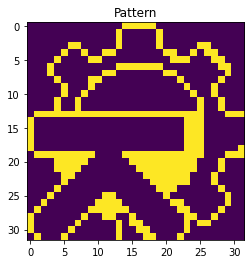

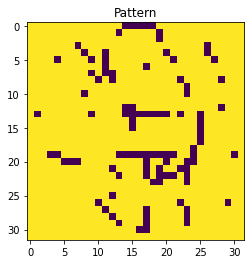

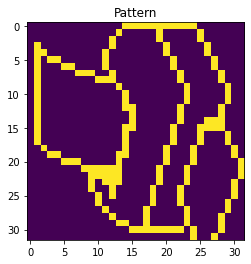

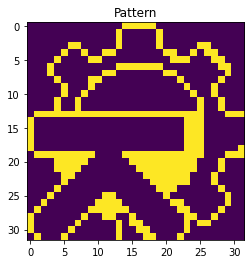

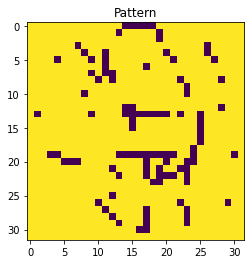

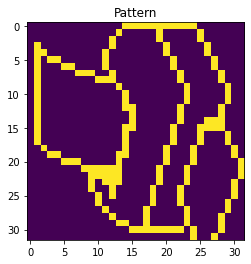

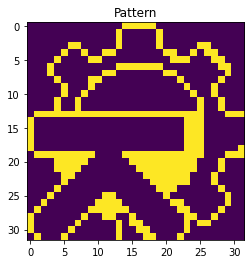

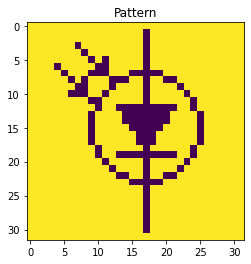

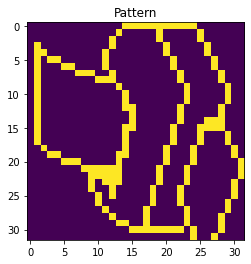

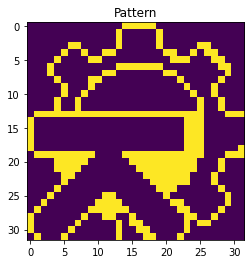

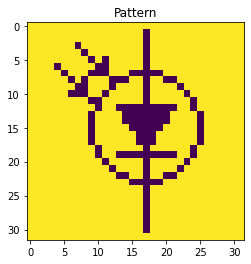

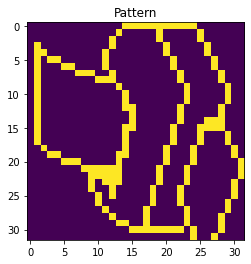

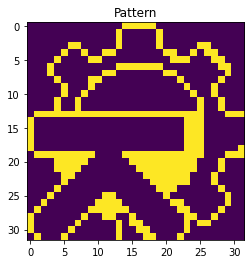

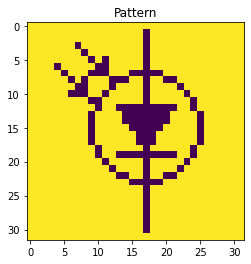

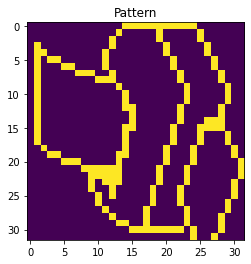

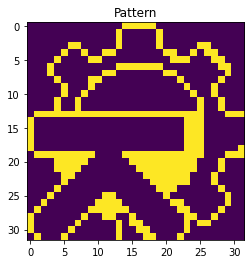

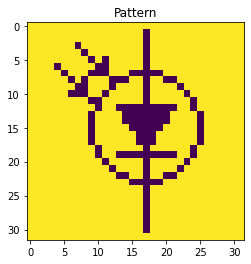

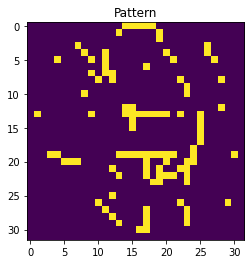

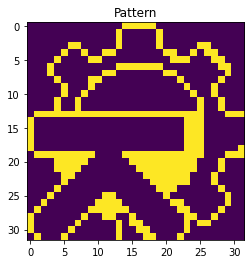

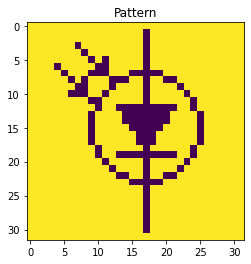

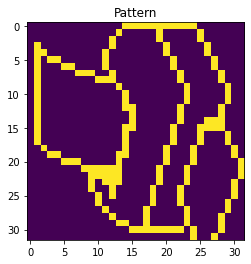

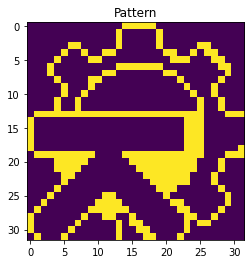

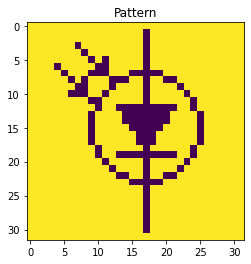

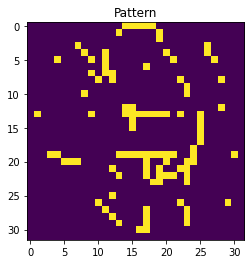

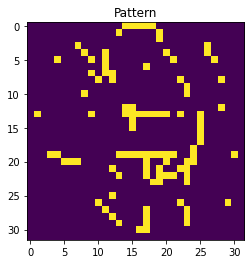

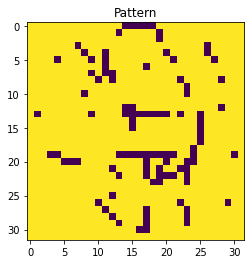

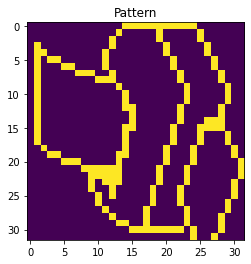

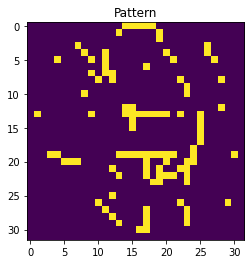

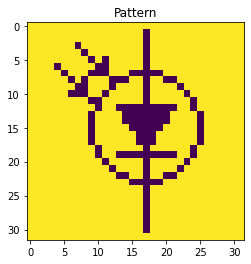

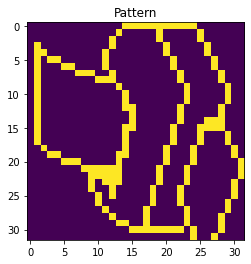

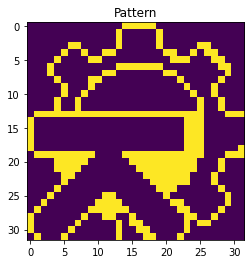

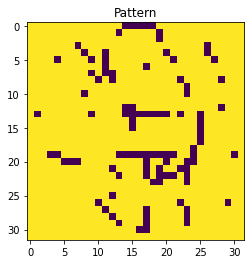

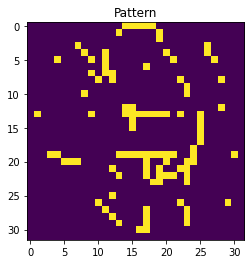

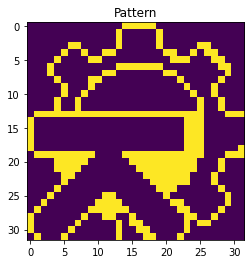

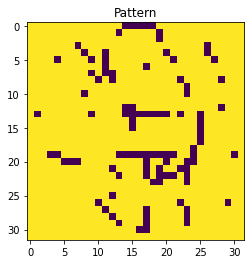

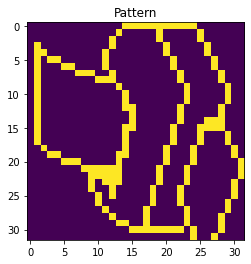

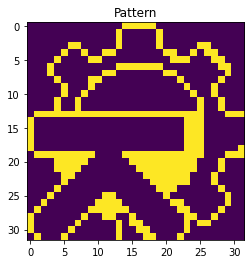

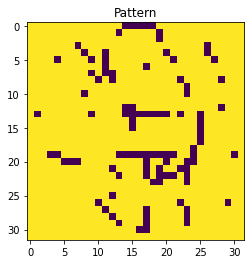

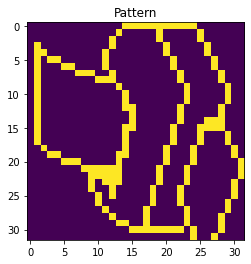

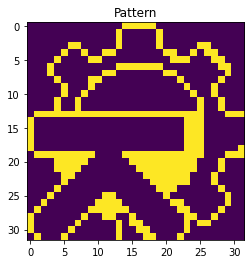

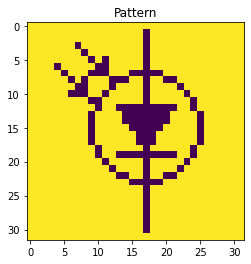

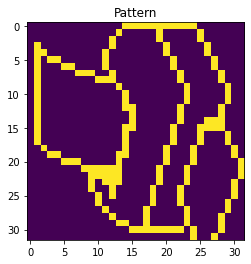

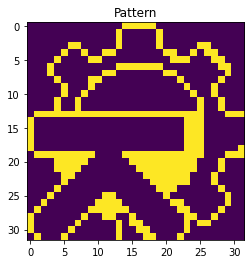

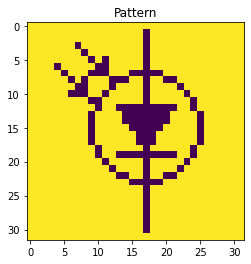

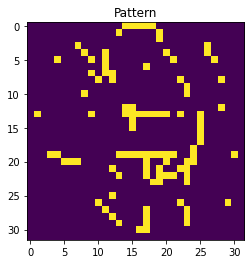

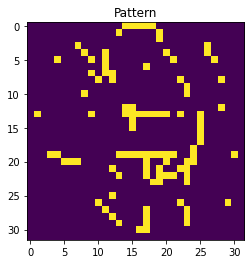

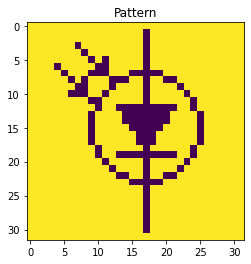

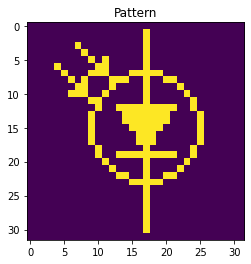

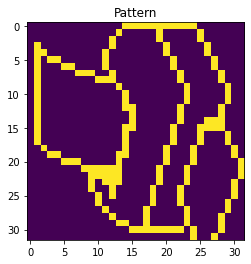

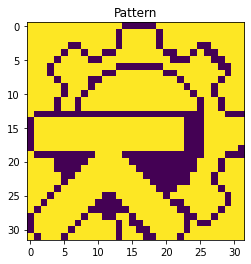

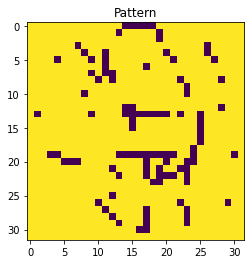

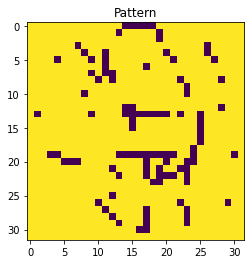

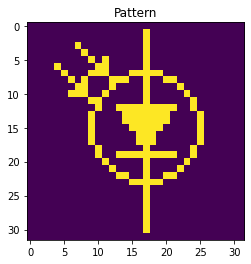

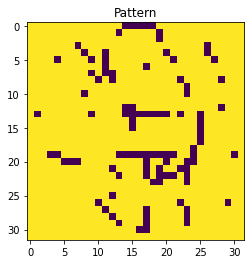

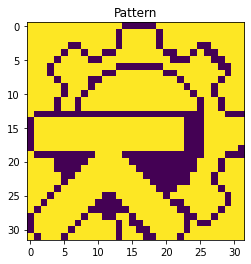

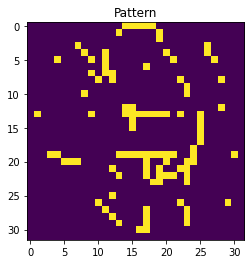

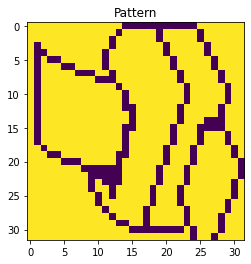

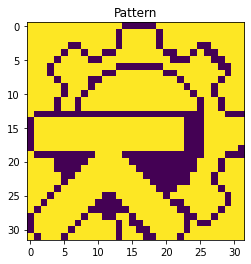

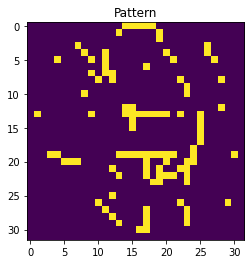

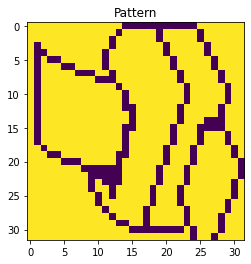

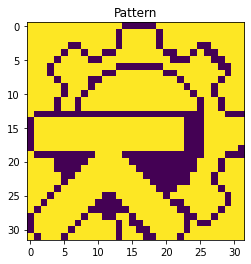

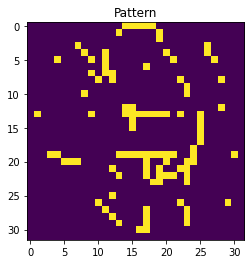

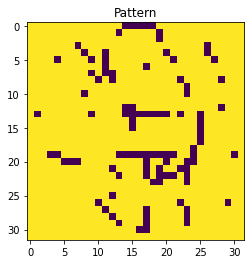

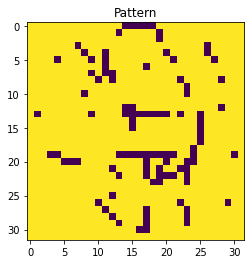

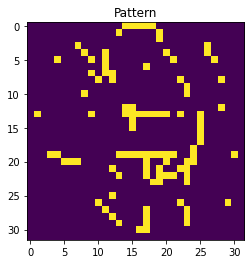

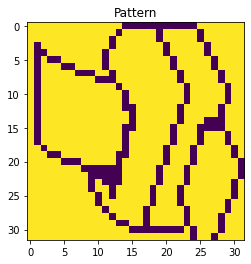

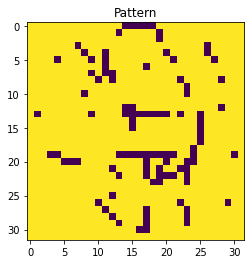

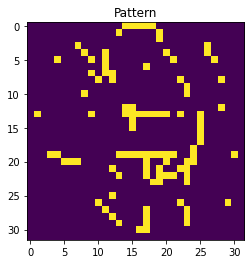

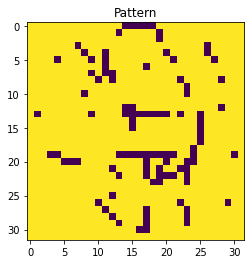

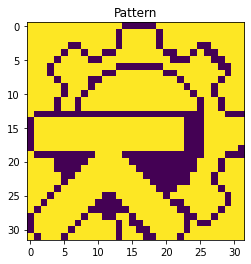

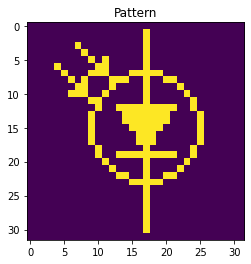

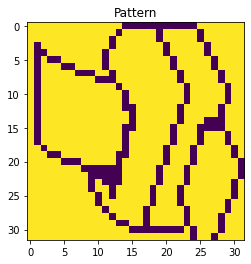

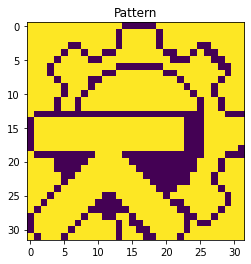

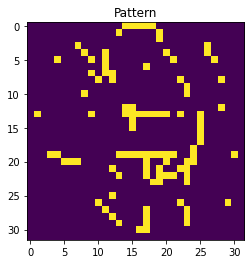

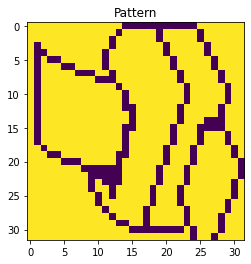

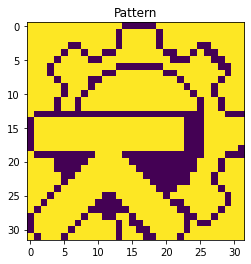

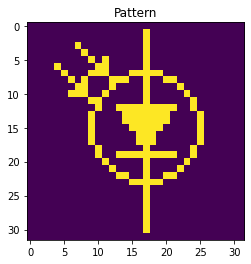

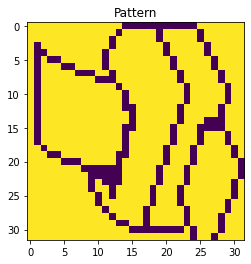

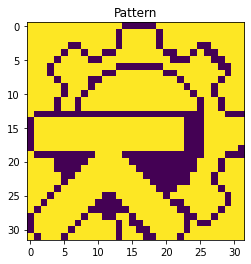

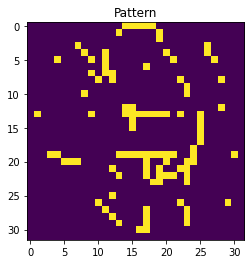

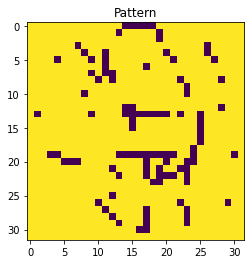

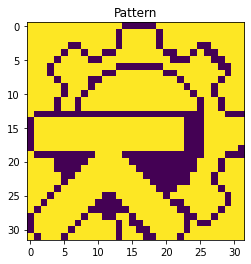

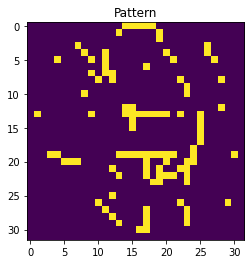

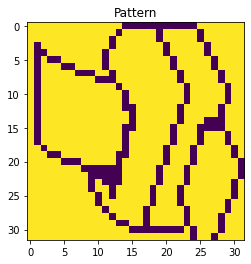

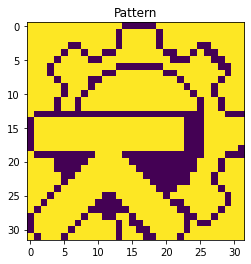

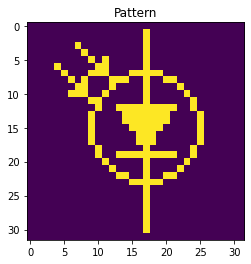

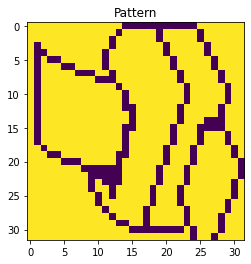

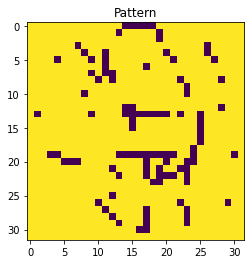

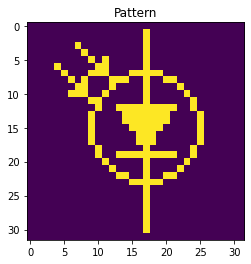

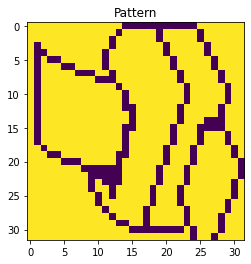

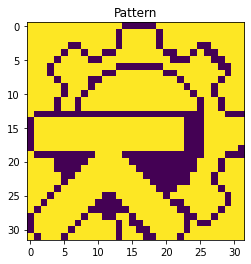

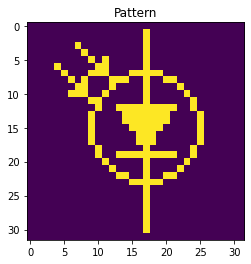

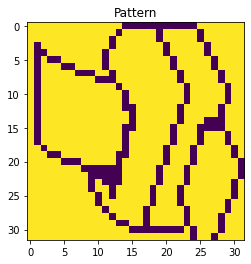

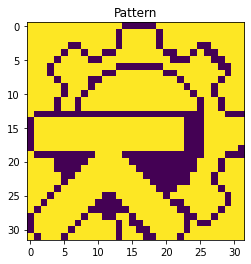

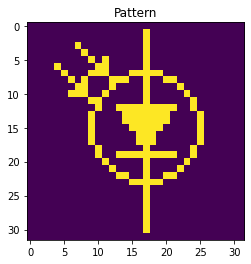

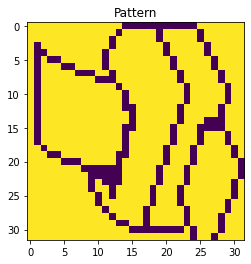

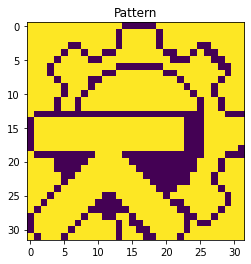

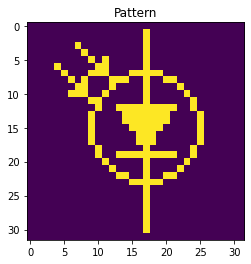

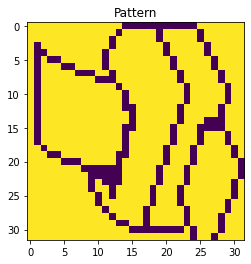

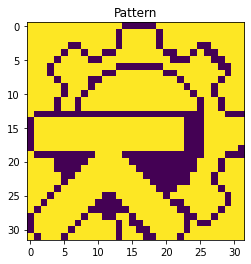

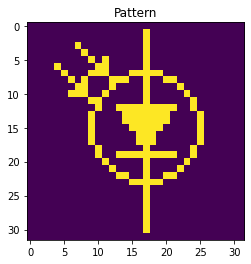

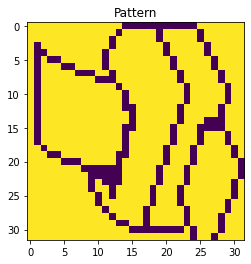

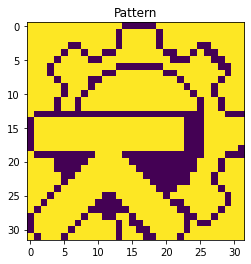

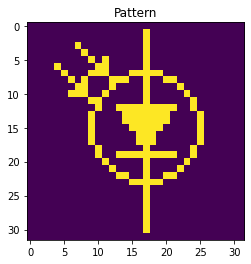

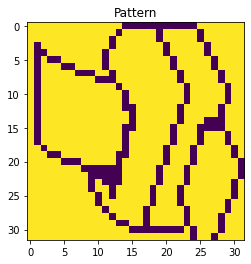

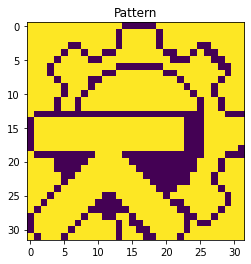

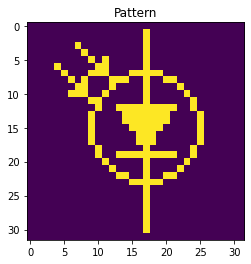

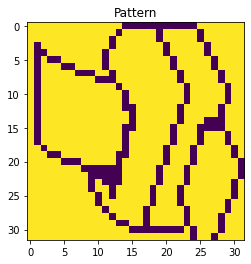

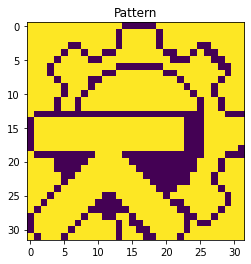

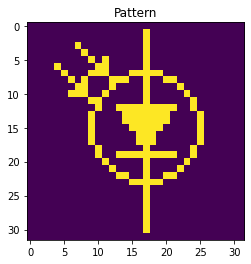

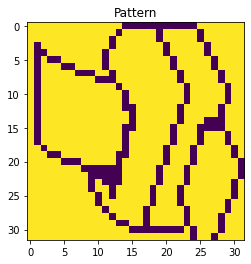

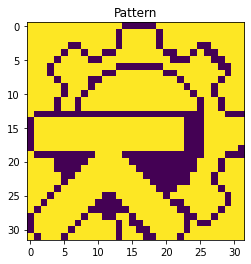

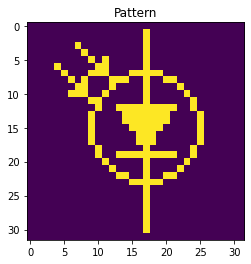

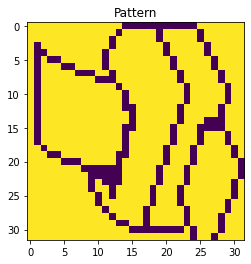

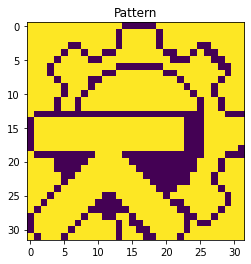

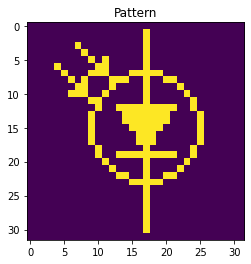

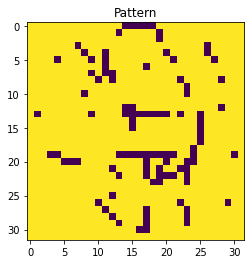

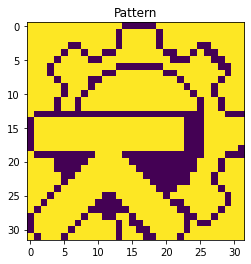

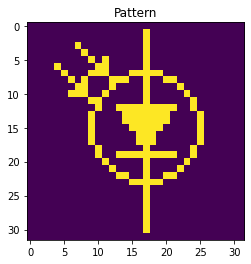

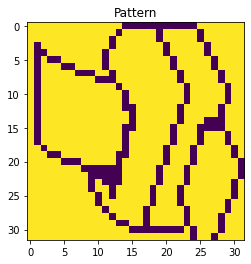

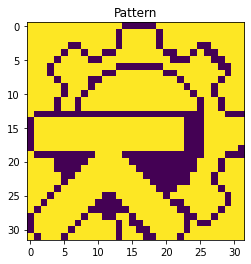

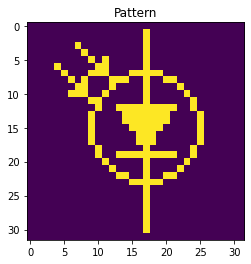

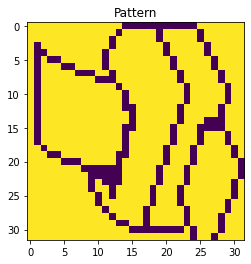

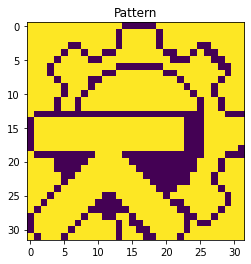

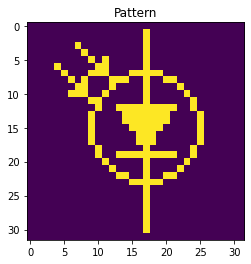

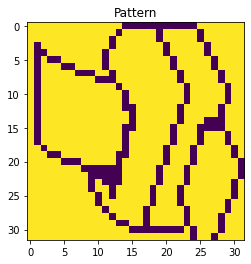

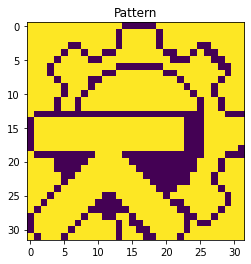

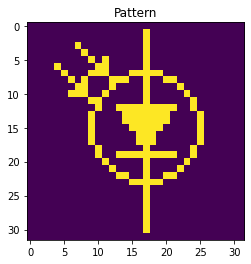

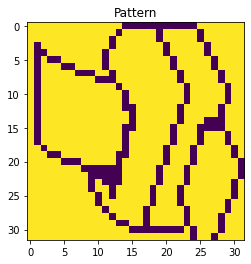

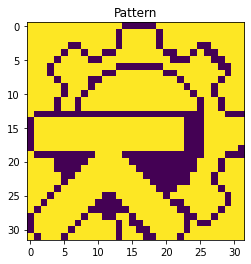

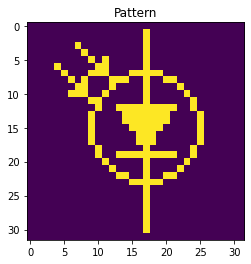

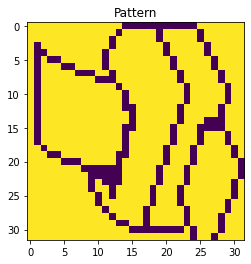

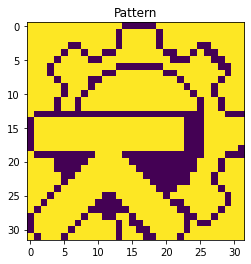

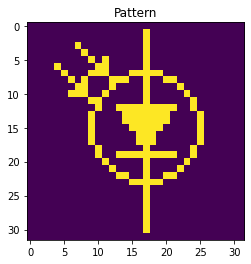

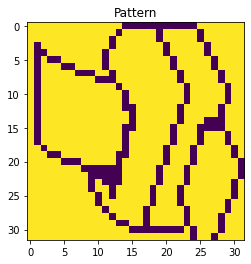

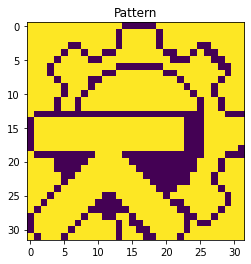

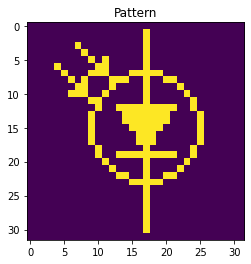

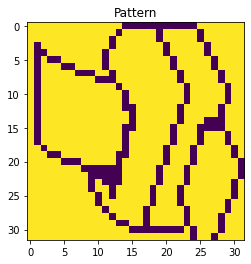

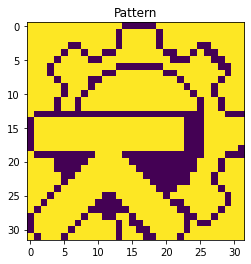

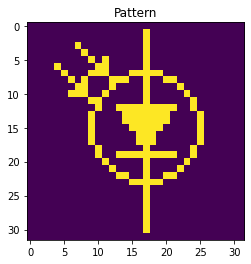

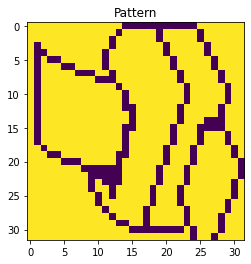

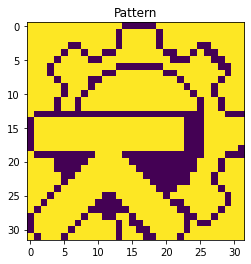

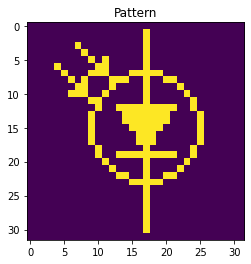

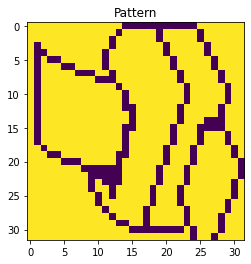

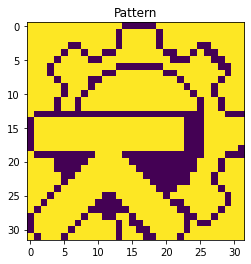

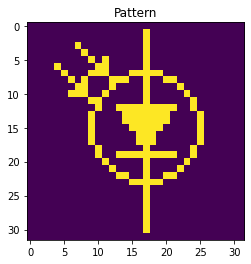

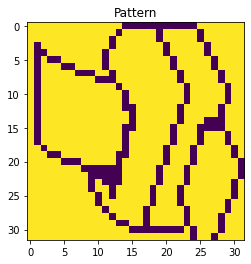

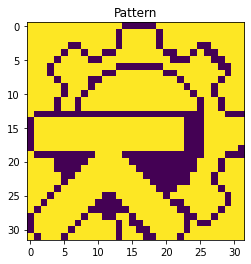

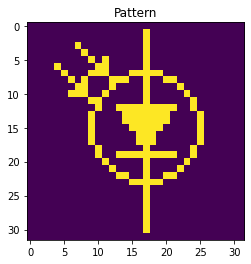

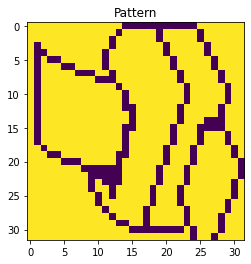

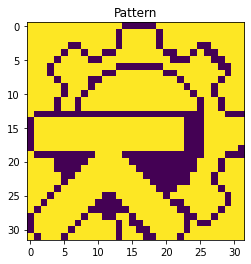

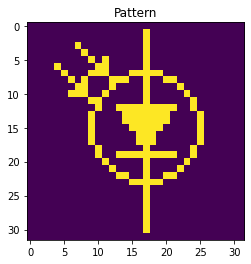

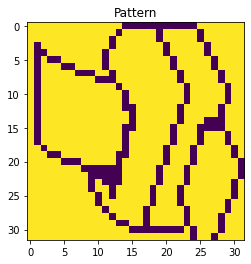

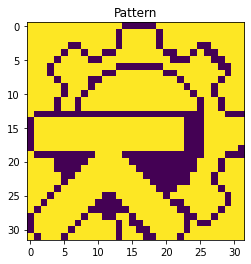

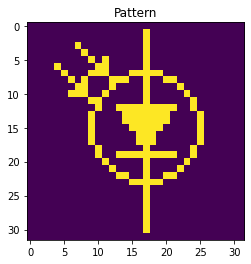

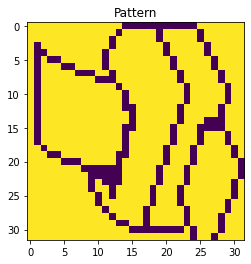

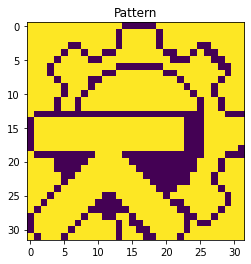

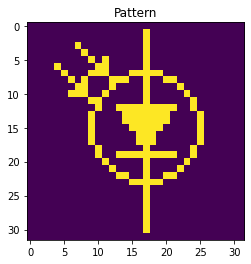

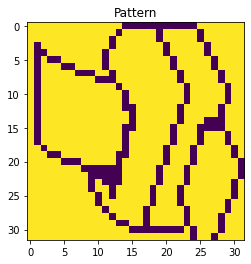

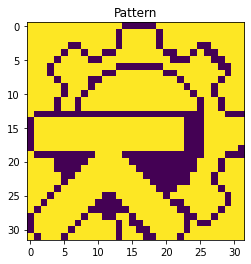

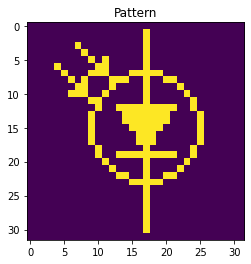

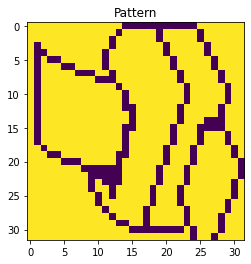

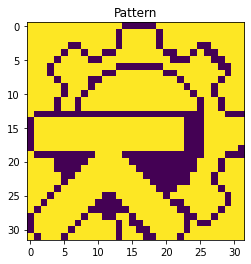

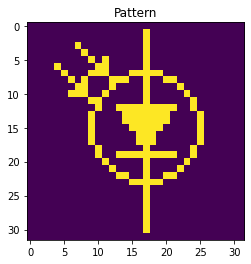

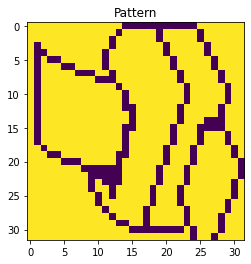

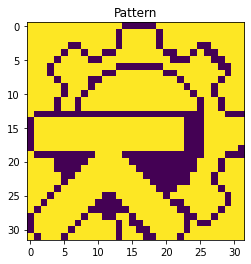

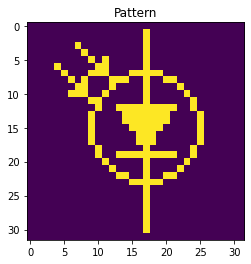

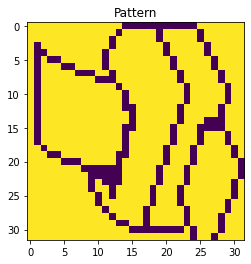

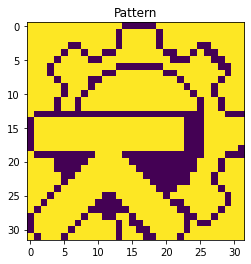

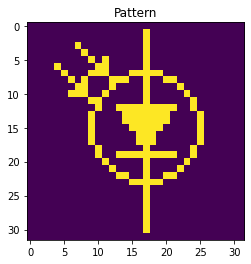

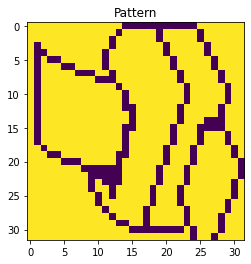

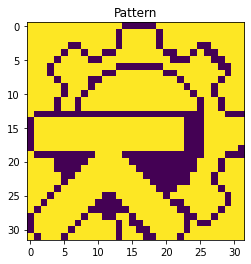

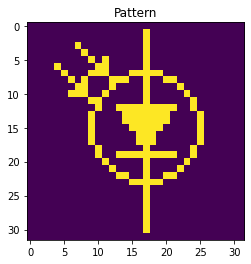

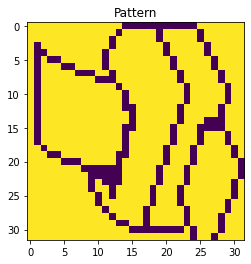

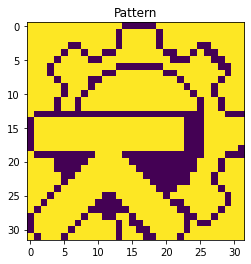

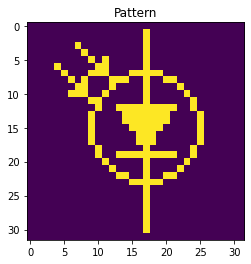

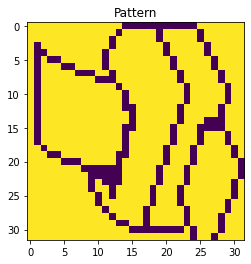

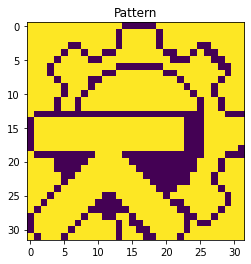

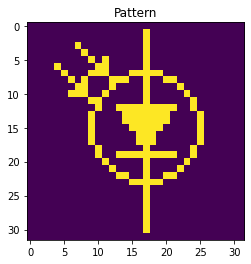

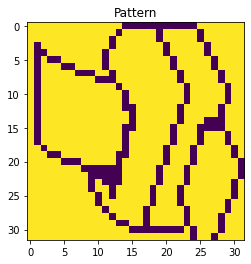

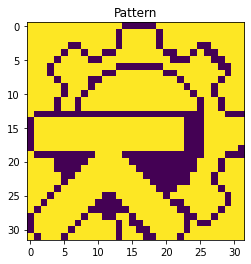

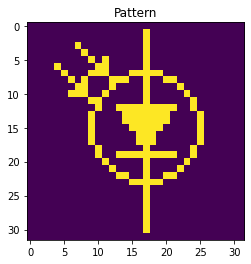

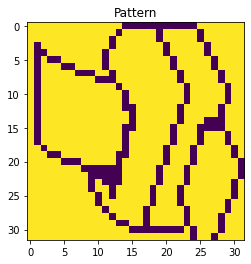

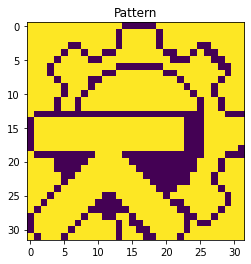

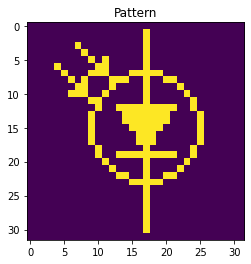

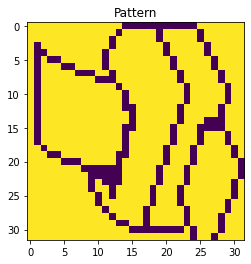

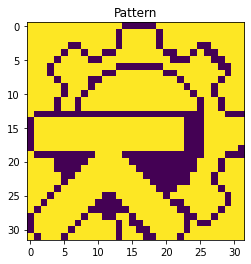

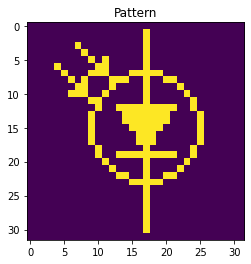

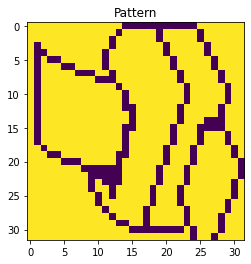

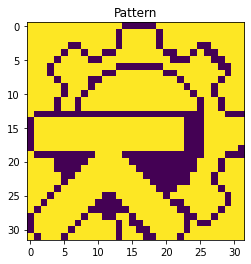

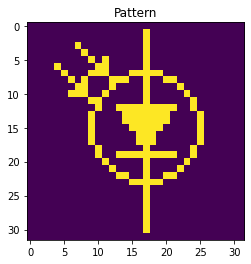

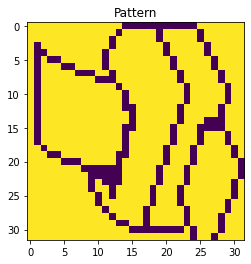

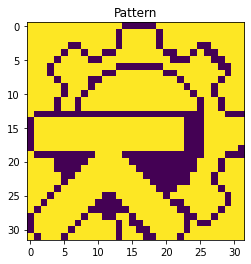

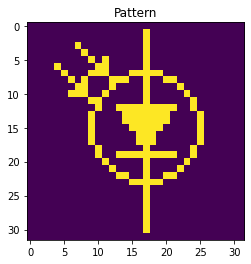

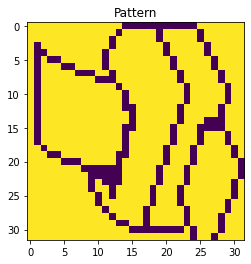

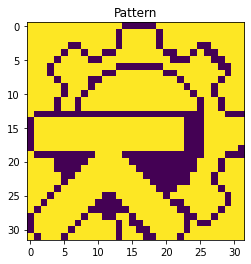

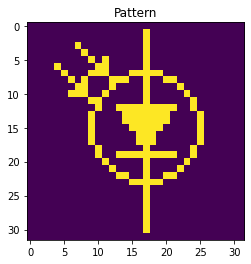

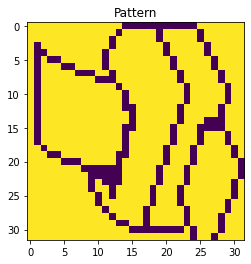

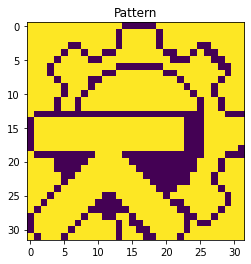

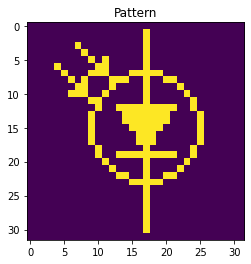

In [71]:
# flip N percent of the bits 10 step
converged = []
convergedi = [[],[],[],[]]
for N in range(101):
    total = 0
    for i in range(3):
        noisy = flip(patterns[i], int(10.24 * N))
        noisyOut = converge(W, noisy, 1)
        display_pattern(noisyOut)
        succ = np.array_equal(noisyOut, patterns[i])
        convergedi[i].append(1*succ)
        total += succ
    converged.append(total/3.)

Text(0, 0.5, 'Accuracy')

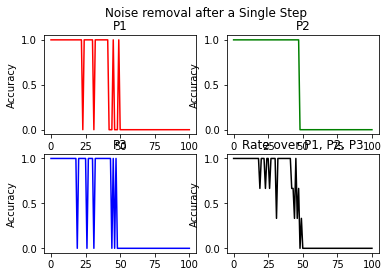

In [70]:
xaxis = np.arange(0, 101)

plt.figure()
plt.suptitle("Noise removal after a Single Step")

plt.subplot(2, 2, 1)
plt.plot(xaxis, convergedi[0], 'r', label='p1')
plt.title('P1')
plt.ylabel("Accuracy")

plt.subplot(2, 2, 2)
plt.plot(xaxis, convergedi[1], 'g', label='p2')
plt.title('P2')
plt.ylabel("Accuracy")

plt.subplot(2, 2, 3)
plt.plot(xaxis, convergedi[2], 'b', label='p3')
plt.title('P3')
plt.ylabel("Accuracy")

plt.subplot(2, 2, 4)
plt.plot(xaxis, converged, 'k', label='p1')
plt.title('Rate over P1, P2, P3')
plt.ylabel("Accuracy")

We observe that the oscillation bearing is long for some attractors, so the network doesn't always converge to the right network. 

But the extra iterations help, with 10 iterations, the network with P2 always converges to P2.

We observe there areother attractors which are theopposite of our currentattractors.